In [26]:
import pandas as pd 

import plotly.express as px 
import plotly.graph_objects as go 
import plotly.io as pio   
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.colors as colors 
pio.templates.default = "plotly_white"  

In [27]:
data = pd.read_csv("Sample - Superstore.csv", encoding='latin-1') 
#encoding='latin-1': for Special characters 
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Let’s start by looking at the descriptive statistics of the dataset

In [28]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The dataset has an order date column. We can use this column
to create new columns like order month, order year, and order day,
which will be very valuable for sales and profit analysis 
according to time periods. So let’s add these columns:

In [29]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Converting Date Columns

In [31]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 
#Date Conversion: Order Date aur Ship Date columns ko datetime format me convert kiya gaya hai for date-based analysis.


# Adding New Date-Based Columns

In [32]:
data['Order Month'] = data['Order Date'].dt.month 
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

#Order Month: Order date se month extract karte hain.
#Order Year: Order date se year extract hota hai.
#Order Day of Week: Week ka day (0 for Monday, 6 for Sunday) extract kiya gaya hai.

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [33]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


# Monthly Sales Analysis

In [34]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month, 
              x='Order Month', 
              y='Sales', 
              title='Monthly Sales Analysis')
fig.show()

In [35]:
#Data Grouping:
#data.groupby('Order Month')['Sales'].sum() se har month ki total sales nikalte hain.
#.reset_index() data ko structured format me rakhta hai.
#px.line: Monthly sales trend show karne ke liye line chart banaya gaya hai.
#fig.show(): Graph display karta hai.


# Sales Analysis by Category

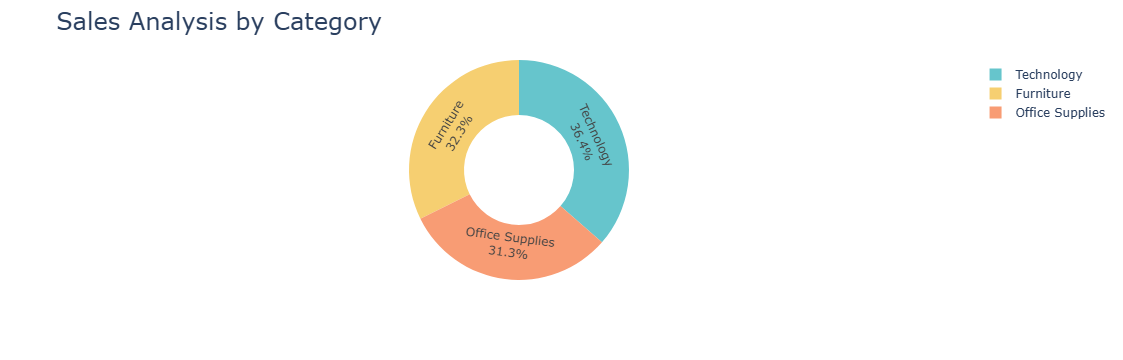

In [36]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()


fig = px.pie(sales_by_category, 
             values='Sales', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))

fig.show()

In [37]:
#groupby('Category'): Category-wise sales nikalte hain.
#Pie Chart:
#px.pie: Sales proportions ko pie chart me show karta hai.
#hole=0.5: Donut-style chart banata hai.
#Pastel Colors: Chart me soft color palette use kiya gaya hai.


# Sales Analysis by Sub-Category

In [38]:
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()
fig = px.bar(sales_by_subcategory, 
             x='Sub-Category', 
             y='Sales', 
             title='Sales Analysis by Sub-Category')
fig.show()

# Monthly Profit Analysis

In [39]:
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
fig = px.line(profit_by_month, 
              x='Order Month', 
              y='Profit', 
              title='Monthly Profit Analysis')
fig.show()

# Profit Analysis by Category

In [40]:
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

fig = px.pie(profit_by_category, 
             values='Profit', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category', title_font=dict(size=24))

fig.show()

# Profit Analysis by Sub-Category

In [41]:
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, x='Sub-Category', 
             y='Profit', 
             title='Profit Analysis by Sub-Category')
fig.show()

# Sales and Profit Analysis by Customer Segment

In [42]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Sales'], 
                     name='Sales',
                     marker_color=color_palette[0]))

fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Profit'], 
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')

fig.show()

# analyse sales-to-profit ratio

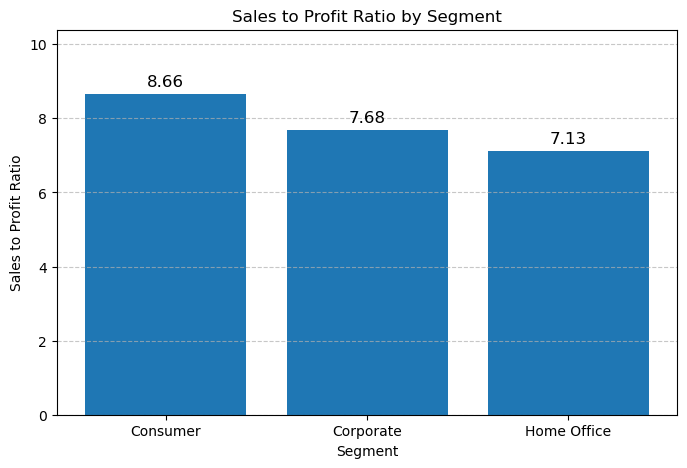

In [43]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
plt.figure(figsize=(8, 5))
plt.bar(sales_profit_by_segment['Segment'], sales_profit_by_segment['Sales_to_Profit_Ratio'],)
plt.xlabel('Segment')
plt.ylabel('Sales to Profit Ratio')
plt.title('Sales to Profit Ratio by Segment')
plt.ylim(0, max(sales_profit_by_segment['Sales_to_Profit_Ratio']) * 1.2)  # Adjust limit for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars
for i, ratio in enumerate(sales_profit_by_segment['Sales_to_Profit_Ratio']):
    plt.text(i, ratio + 0.2, f'{ratio:.2f}', ha='center', fontsize=12)

plt.show()

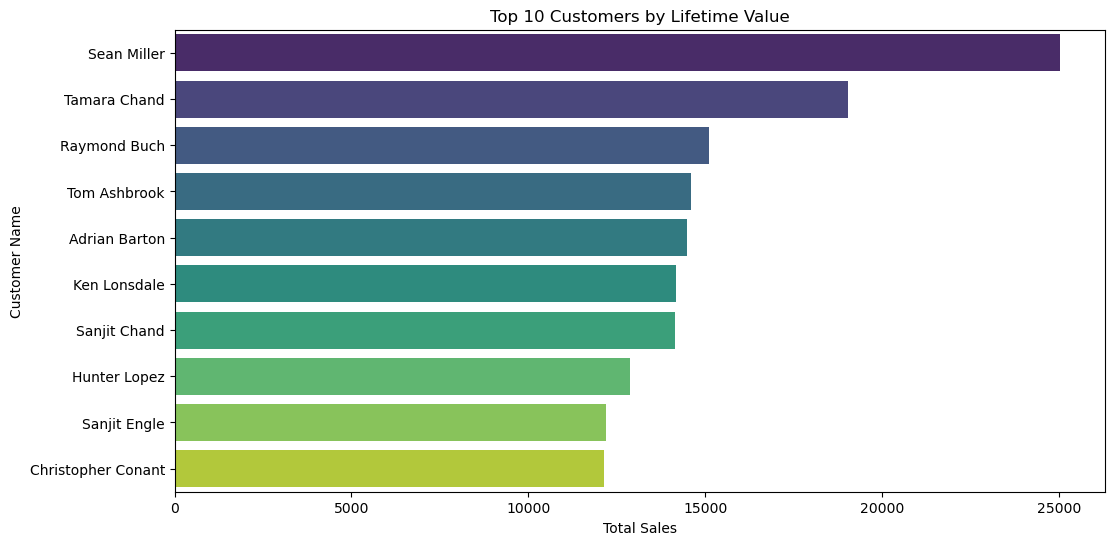

In [41]:
# Customer Lifetime Value (CLV) Analysis
clv = data.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=clv.values, y=clv.index, hue=clv.index, palette="viridis", legend=False)
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.title("Top 10 Customers by Lifetime Value")
plt.show()

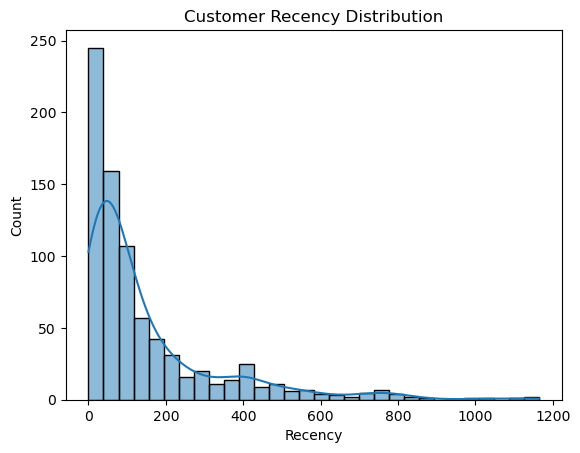

In [28]:
# 2. Churn Prediction (Simple RFM Analysis)
rfm = data.groupby("Customer ID").agg({
    "Order Date": "max",  # Recency
    "Order ID": "nunique", # Frequency
    "Sales": "sum" # Monetary
})
rfm['Recency'] = (data['Order Date'].max() - rfm['Order Date']).dt.days
rfm.drop(columns=["Order Date"], inplace=True)
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title("Customer Recency Distribution")
plt.show()

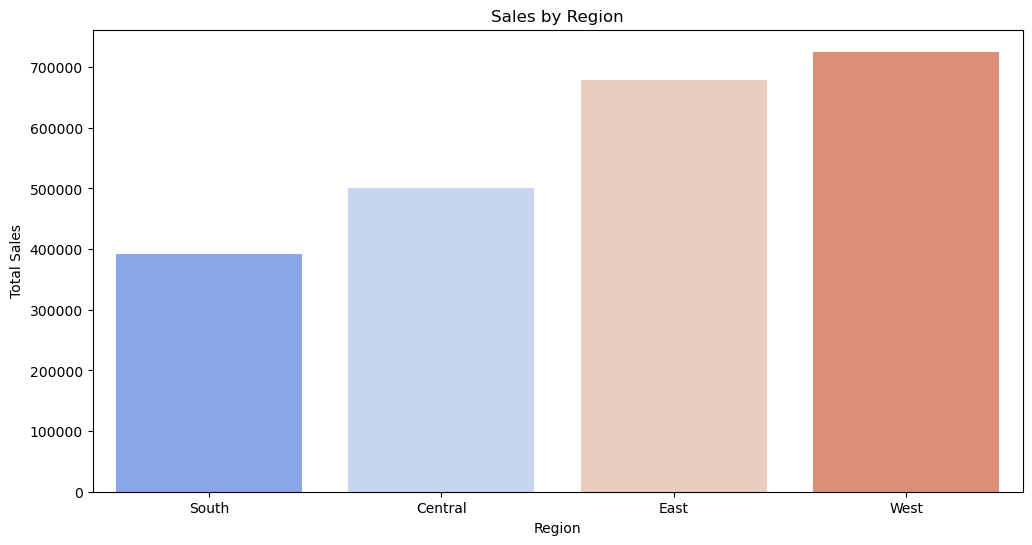

In [29]:
# 3. Regional Performance Analysis
region_sales = data.groupby("Region")["Sales"].sum().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette="coolwarm", legend=False)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Sales by Region")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14860\1474271724.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



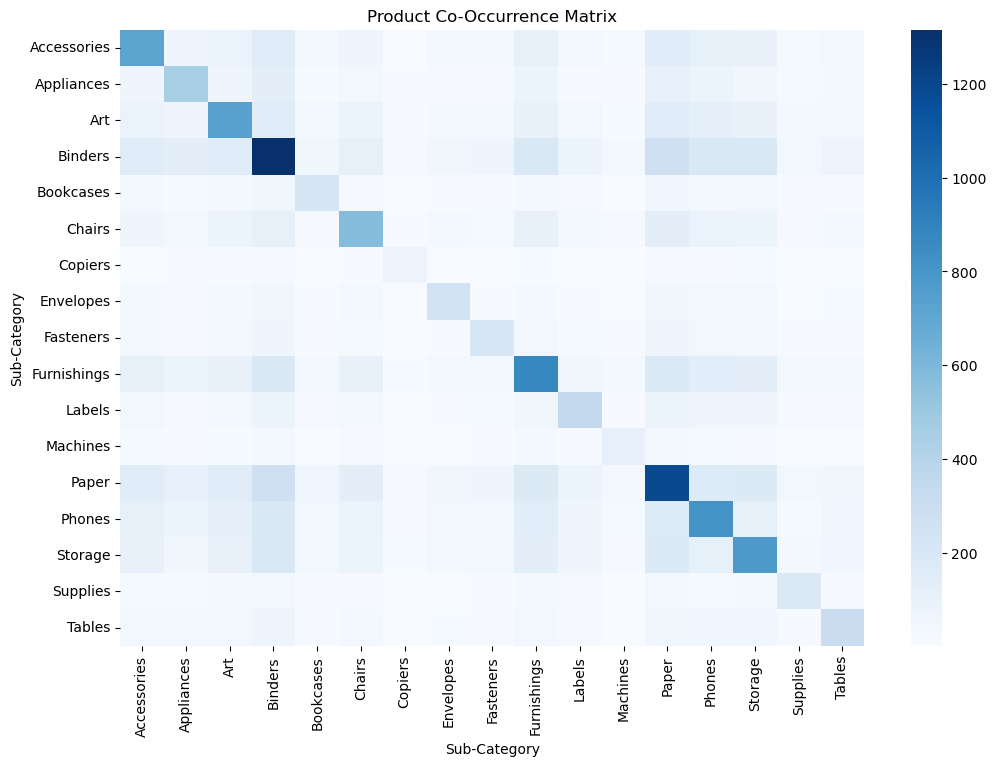

In [30]:
# 5. Market Basket Analysis
order_product_matrix = data.pivot_table(index='Order ID', columns='Sub-Category', values='Quantity', aggfunc='sum', fill_value=0)
order_product_matrix = order_product_matrix.applymap(lambda x: 1 if x > 0 else 0)
co_occurrence_matrix = order_product_matrix.T.dot(order_product_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_matrix, cmap="Blues", annot=False)
plt.title("Product Co-Occurrence Matrix")
plt.show()

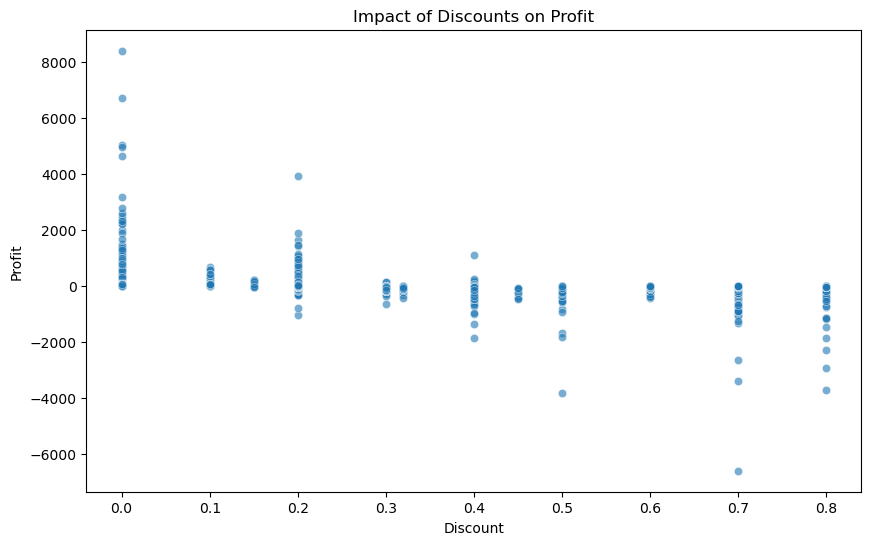

In [31]:
# 6. Discount Effectiveness Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Discount'], y=data['Profit'], alpha=0.6)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Impact of Discounts on Profit")
plt.show()

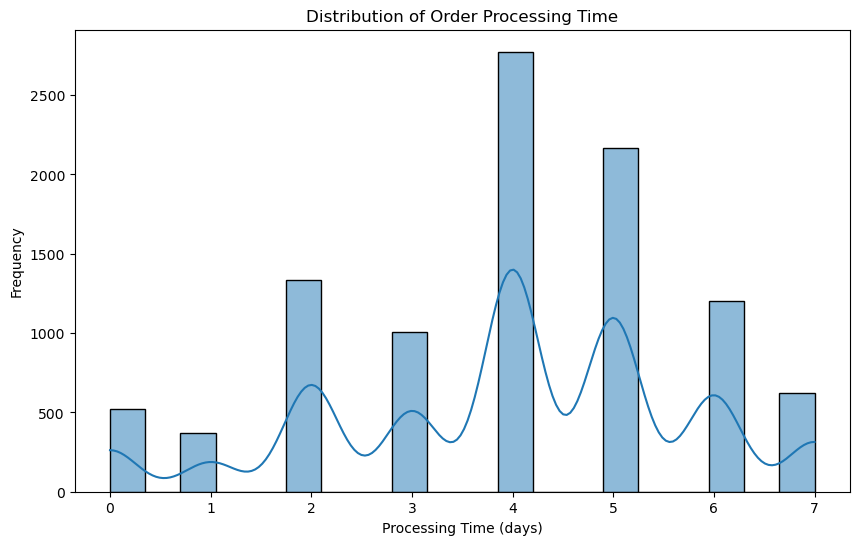

In [32]:
# 7. Order Processing Efficiency


data['Processing Time'] = (data['Ship Date'] - data['Order Date']).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(data['Processing Time'], bins=20, kde=True)
plt.xlabel("Processing Time (days)")
plt.ylabel("Frequency")
plt.title("Distribution of Order Processing Time")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



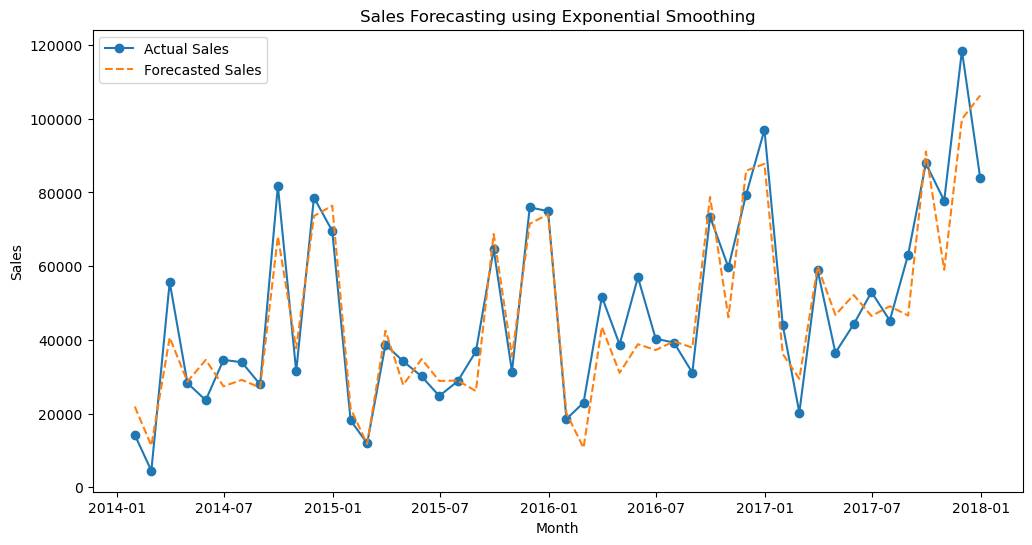

In [38]:
# Ensure 'Sales' is numeric
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')

# Resample sales data
data_sales = data.resample('ME', on='Order Date').sum(numeric_only=True)

# Apply Exponential Smoothing
model = ExponentialSmoothing(data_sales['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit()
data_sales['Forecast'] = model.predict(start=data_sales.index[0], end=data_sales.index[-1])
plt.figure(figsize=(12, 6))
plt.plot(data_sales.index, data_sales['Sales'], label="Actual Sales", marker='o')
plt.plot(data_sales.index, data_sales['Forecast'], label="Forecasted Sales", linestyle="dashed")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales Forecasting using Exponential Smoothing")
plt.legend()
plt.show()


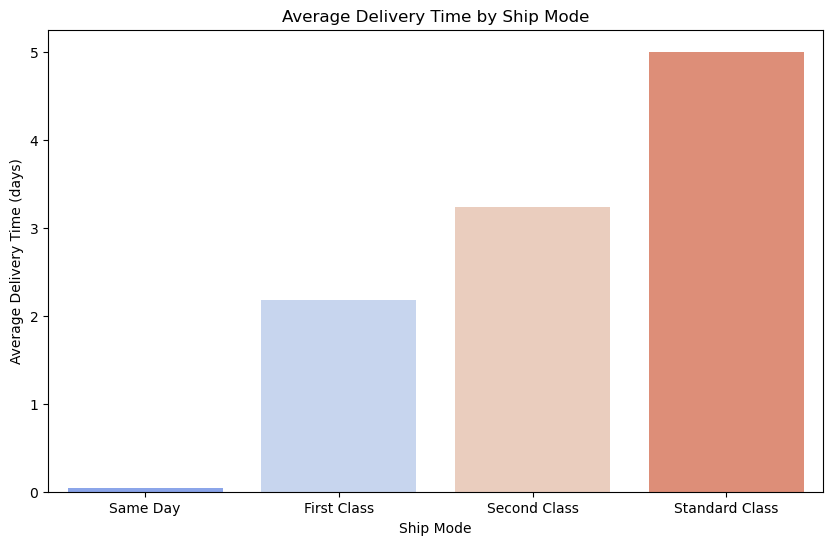

In [45]:
# 9. Delivery Speed Analysis by Ship Mode
data['Delivery Time'] = (data['Ship Date'] - data['Order Date']).dt.days
ship_mode_avg = data.groupby('Ship Mode')['Delivery Time'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=ship_mode_avg.index, y=ship_mode_avg.values, hue=ship_mode_avg.index, palette="coolwarm", legend=False)
plt.xlabel("Ship Mode")
plt.ylabel("Average Delivery Time (days)")
plt.title("Average Delivery Time by Ship Mode")
plt.show()
